# Statistical Thinking: Probability & Distributions
## Slides 7-14: Interactive Visual Demonstrations

This notebook provides visual demonstrations for each slide. Run cells as you present each slide.

---

In [1]:
# Import all required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.patches import Rectangle, FancyBboxPatch
import pandas as pd
from IPython.display import display, HTML

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("✓ All libraries loaded successfully!")

✓ All libraries loaded successfully!


---
# SLIDE 7: Basic Probability Concepts

**Key Ideas:**
- Probability ranges from 0 (impossible) to 1 (certain)
- Complement Rule: P(not A) = 1 - P(A)
- Addition Rule: P(A or B)
- Multiplication Rule: P(A and B)

**Real-World Example:** Store visitor conversion rates

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_73583/2692735731.py:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


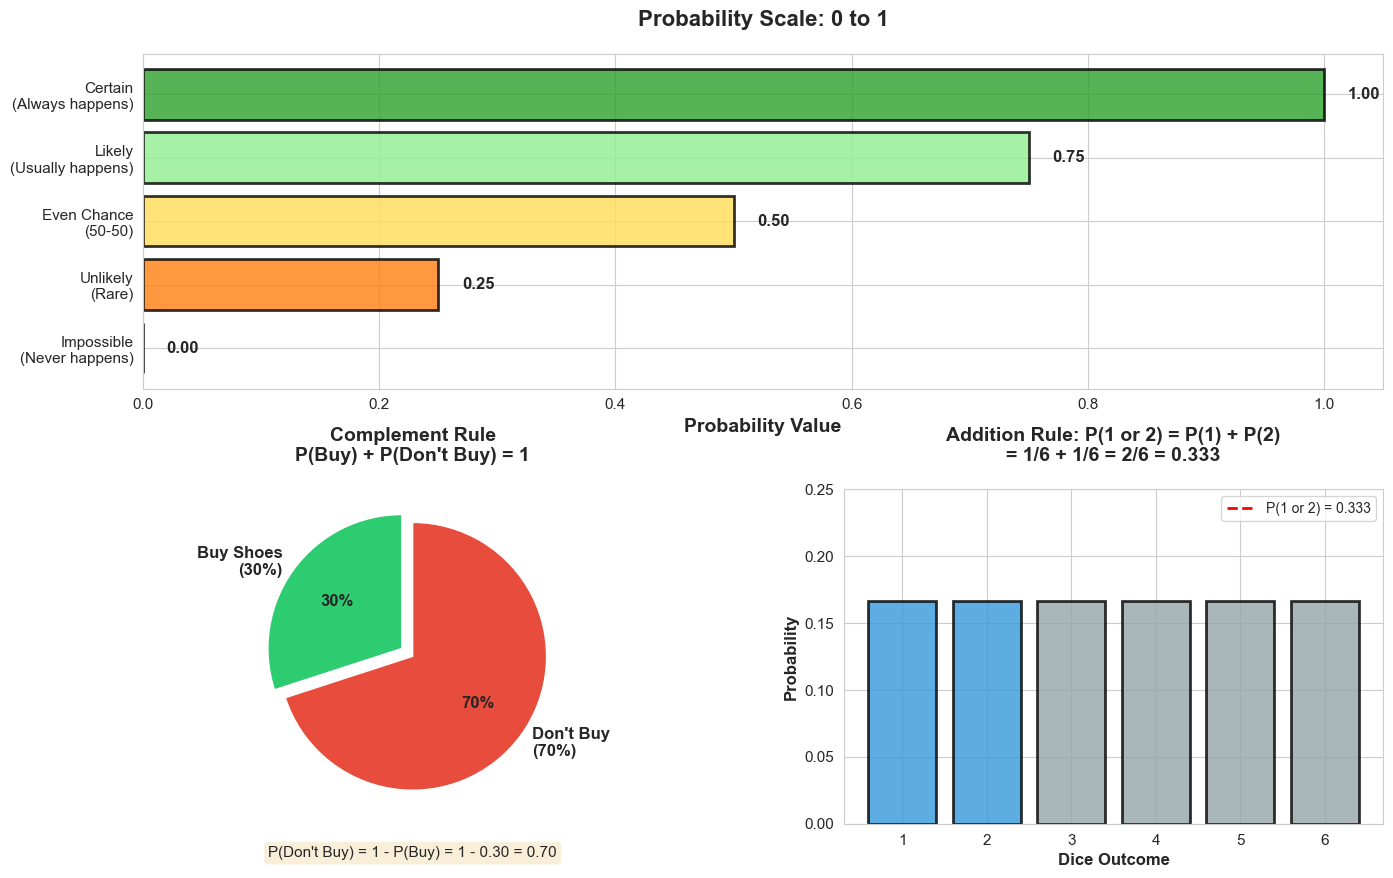


📊 KEY TAKEAWAYS:
• Probability is always between 0 and 1
• If P(Buy) = 0.30, then P(Don't Buy) = 0.70
• Add probabilities for 'OR' events (if mutually exclusive)


In [2]:
# SLIDE 7 VISUALIZATION: Basic Probability Concepts

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# 1. Probability Scale
ax1 = fig.add_subplot(gs[0, :])
events = ['Impossible\n(Never happens)', 'Unlikely\n(Rare)', 'Even Chance\n(50-50)', 
          'Likely\n(Usually happens)', 'Certain\n(Always happens)']
probs = [0, 0.25, 0.5, 0.75, 1.0]
colors = ['#d62728', '#ff7f0e', '#ffdd57', '#90ee90', '#2ca02c']

bars = ax1.barh(events, probs, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_xlim(0, 1.05)
ax1.set_xlabel('Probability Value', fontsize=14, fontweight='bold')
ax1.set_title('Probability Scale: 0 to 1', fontsize=16, fontweight='bold', pad=20)

# Add probability values on bars
for i, (bar, prob) in enumerate(zip(bars, probs)):
    ax1.text(prob + 0.02, i, f'{prob:.2f}', va='center', fontsize=12, fontweight='bold')

# 2. Complement Rule: Store Visitors
ax2 = fig.add_subplot(gs[1, 0])
sizes = [30, 70]
labels = ['Buy Shoes\n(30%)', "Don't Buy\n(70%)"]
colors_pie = ['#2ecc71', '#e74c3c']
explode = (0.1, 0)

wedges, texts, autotexts = ax2.pie(sizes, labels=labels, colors=colors_pie, autopct='%1.0f%%',
                                     explode=explode, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Complement Rule\nP(Buy) + P(Don\'t Buy) = 1', fontsize=14, fontweight='bold', pad=20)

# Add equation
ax2.text(0, -1.5, 'P(Don\'t Buy) = 1 - P(Buy) = 1 - 0.30 = 0.70', 
         ha='center', fontsize=11, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 3. Dice Roll Example: Addition Rule
ax3 = fig.add_subplot(gs[1, 1])
dice_outcomes = ['1', '2', '3', '4', '5', '6']
dice_probs = [1/6] * 6
colors_dice = ['#3498db' if x in ['1', '2'] else '#95a5a6' for x in dice_outcomes]

bars = ax3.bar(dice_outcomes, dice_probs, color=colors_dice, alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax3.set_xlabel('Dice Outcome', fontsize=12, fontweight='bold')
ax3.set_title('Addition Rule: P(1 or 2) = P(1) + P(2)\n= 1/6 + 1/6 = 2/6 = 0.333', 
              fontsize=14, fontweight='bold', pad=20)
ax3.set_ylim(0, 0.25)
ax3.axhline(y=2/6, color='red', linestyle='--', linewidth=2, label='P(1 or 2) = 0.333')
ax3.legend(fontsize=10)

plt.tight_layout()
plt.show()

print("\n📊 KEY TAKEAWAYS:")
print("• Probability is always between 0 and 1")
print("• If P(Buy) = 0.30, then P(Don't Buy) = 0.70")
print("• Add probabilities for 'OR' events (if mutually exclusive)")

---
# SLIDE 8: Conditional Probability & Bayes Theorem

**Key Ideas:**
- Conditional Probability: P(A|B) = probability of A given B happened
- Bayes Theorem: Update beliefs with new evidence
- Prior → Evidence → Posterior

**Real-World Example:** Medical testing and fraud detection

---

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_73583/433543781.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


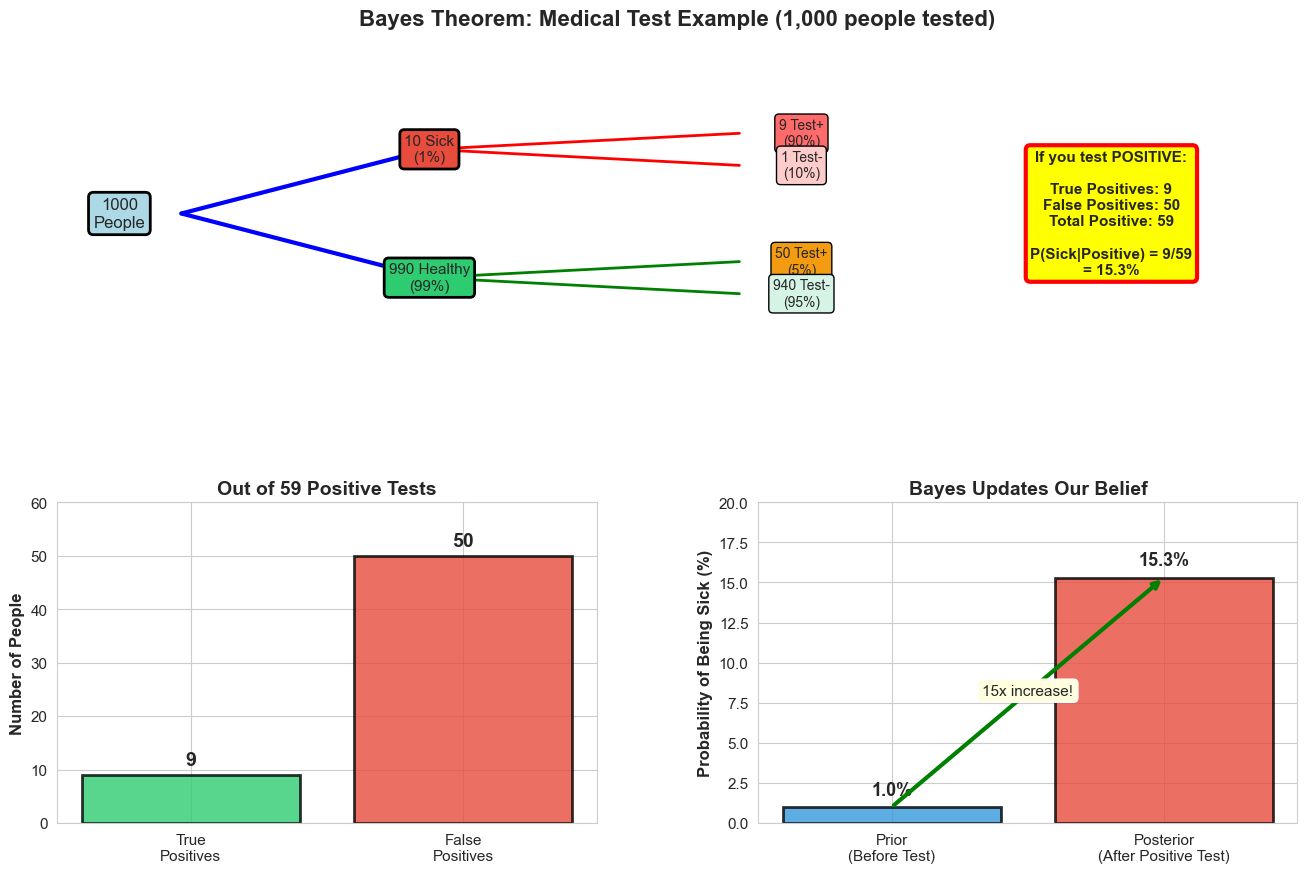


📊 KEY TAKEAWAYS:
• Even with a positive test, you might only have 15% chance of being sick
• False positives can outnumber true positives when disease is rare
• Bayes Theorem helps us update beliefs with new evidence
• Prior probability (1%) → Evidence (positive test) → Posterior (15.3%)


In [3]:
# SLIDE 8 VISUALIZATION: Conditional Probability & Bayes Theorem

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.4, wspace=0.3)

# 1. Medical Test Example - Tree Diagram
ax1 = fig.add_subplot(gs[0, :])
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)
ax1.axis('off')
ax1.set_title('Bayes Theorem: Medical Test Example (1,000 people tested)', 
              fontsize=16, fontweight='bold', pad=20)

# Draw tree structure
ax1.plot([1, 3], [5, 7], 'b-', linewidth=3)
ax1.plot([1, 3], [5, 3], 'b-', linewidth=3)
ax1.text(0.5, 5, '1000\nPeople', ha='center', va='center', fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='black', linewidth=2))

# Sick branch
ax1.text(3, 7, '10 Sick\n(1%)', ha='center', va='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='#e74c3c', edgecolor='black', linewidth=2))
ax1.plot([3, 5.5], [7, 7.5], 'r-', linewidth=2)
ax1.plot([3, 5.5], [7, 6.5], 'r-', linewidth=2)
ax1.text(6, 7.5, '9 Test+\n(90%)', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='#ff6b6b', edgecolor='black'))
ax1.text(6, 6.5, '1 Test-\n(10%)', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='#ffcccc', edgecolor='black'))

# Healthy branch
ax1.text(3, 3, '990 Healthy\n(99%)', ha='center', va='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='#2ecc71', edgecolor='black', linewidth=2))
ax1.plot([3, 5.5], [3, 3.5], 'g-', linewidth=2)
ax1.plot([3, 5.5], [3, 2.5], 'g-', linewidth=2)
ax1.text(6, 3.5, '50 Test+\n(5%)', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='#f39c12', edgecolor='black'))
ax1.text(6, 2.5, '940 Test-\n(95%)', ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle='round', facecolor='#d5f4e6', edgecolor='black'))

# Key insight box
ax1.text(8.5, 5, 'If you test POSITIVE:\n\nTrue Positives: 9\nFalse Positives: 50\nTotal Positive: 59\n\nP(Sick|Positive) = 9/59\n= 15.3%', 
         ha='center', va='center', fontsize=11, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='yellow', edgecolor='red', linewidth=3))

# 2. Visualization of True vs False Positives
ax2 = fig.add_subplot(gs[1, 0])
categories = ['True\nPositives', 'False\nPositives']
values = [9, 50]
colors_bar = ['#2ecc71', '#e74c3c']

bars = ax2.bar(categories, values, color=colors_bar, alpha=0.8, edgecolor='black', linewidth=2)
ax2.set_ylabel('Number of People', fontsize=12, fontweight='bold')
ax2.set_title('Out of 59 Positive Tests', fontsize=14, fontweight='bold')
ax2.set_ylim(0, 60)

for bar, val in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{val}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# 3. Bayes Update Visualization
ax3 = fig.add_subplot(gs[1, 1])
stages = ['Prior\n(Before Test)', 'Posterior\n(After Positive Test)']
probabilities = [1.0, 15.3]
colors_update = ['#3498db', '#e74c3c']

bars = ax3.bar(stages, probabilities, color=colors_update, alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_ylabel('Probability of Being Sick (%)', fontsize=12, fontweight='bold')
ax3.set_title('Bayes Updates Our Belief', fontsize=14, fontweight='bold')
ax3.set_ylim(0, 20)

for bar, val in zip(bars, probabilities):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{val}%', ha='center', va='bottom', fontsize=13, fontweight='bold')

ax3.annotate('', xy=(1, 15.3), xytext=(0, 1),
             arrowprops=dict(arrowstyle='->', lw=3, color='green'))
ax3.text(0.5, 8, '15x increase!', fontsize=11, ha='center', 
         bbox=dict(boxstyle='round', facecolor='lightyellow'))

plt.tight_layout()
plt.show()

print("\n📊 KEY TAKEAWAYS:")
print("• Even with a positive test, you might only have 15% chance of being sick")
print("• False positives can outnumber true positives when disease is rare")
print("• Bayes Theorem helps us update beliefs with new evidence")
print("• Prior probability (1%) → Evidence (positive test) → Posterior (15.3%)")

---
# SLIDE 9: Discrete Probability Distributions

**Key Ideas:**
- Discrete = countable outcomes
- **Binomial:** Fixed trials, each success/failure (coin flips, ad clicks)
- **Poisson:** Rare events over time (customers per hour)
- **Geometric:** Tries until first success

**Real-World Example:** A/B testing, customer arrivals, sales calls

---

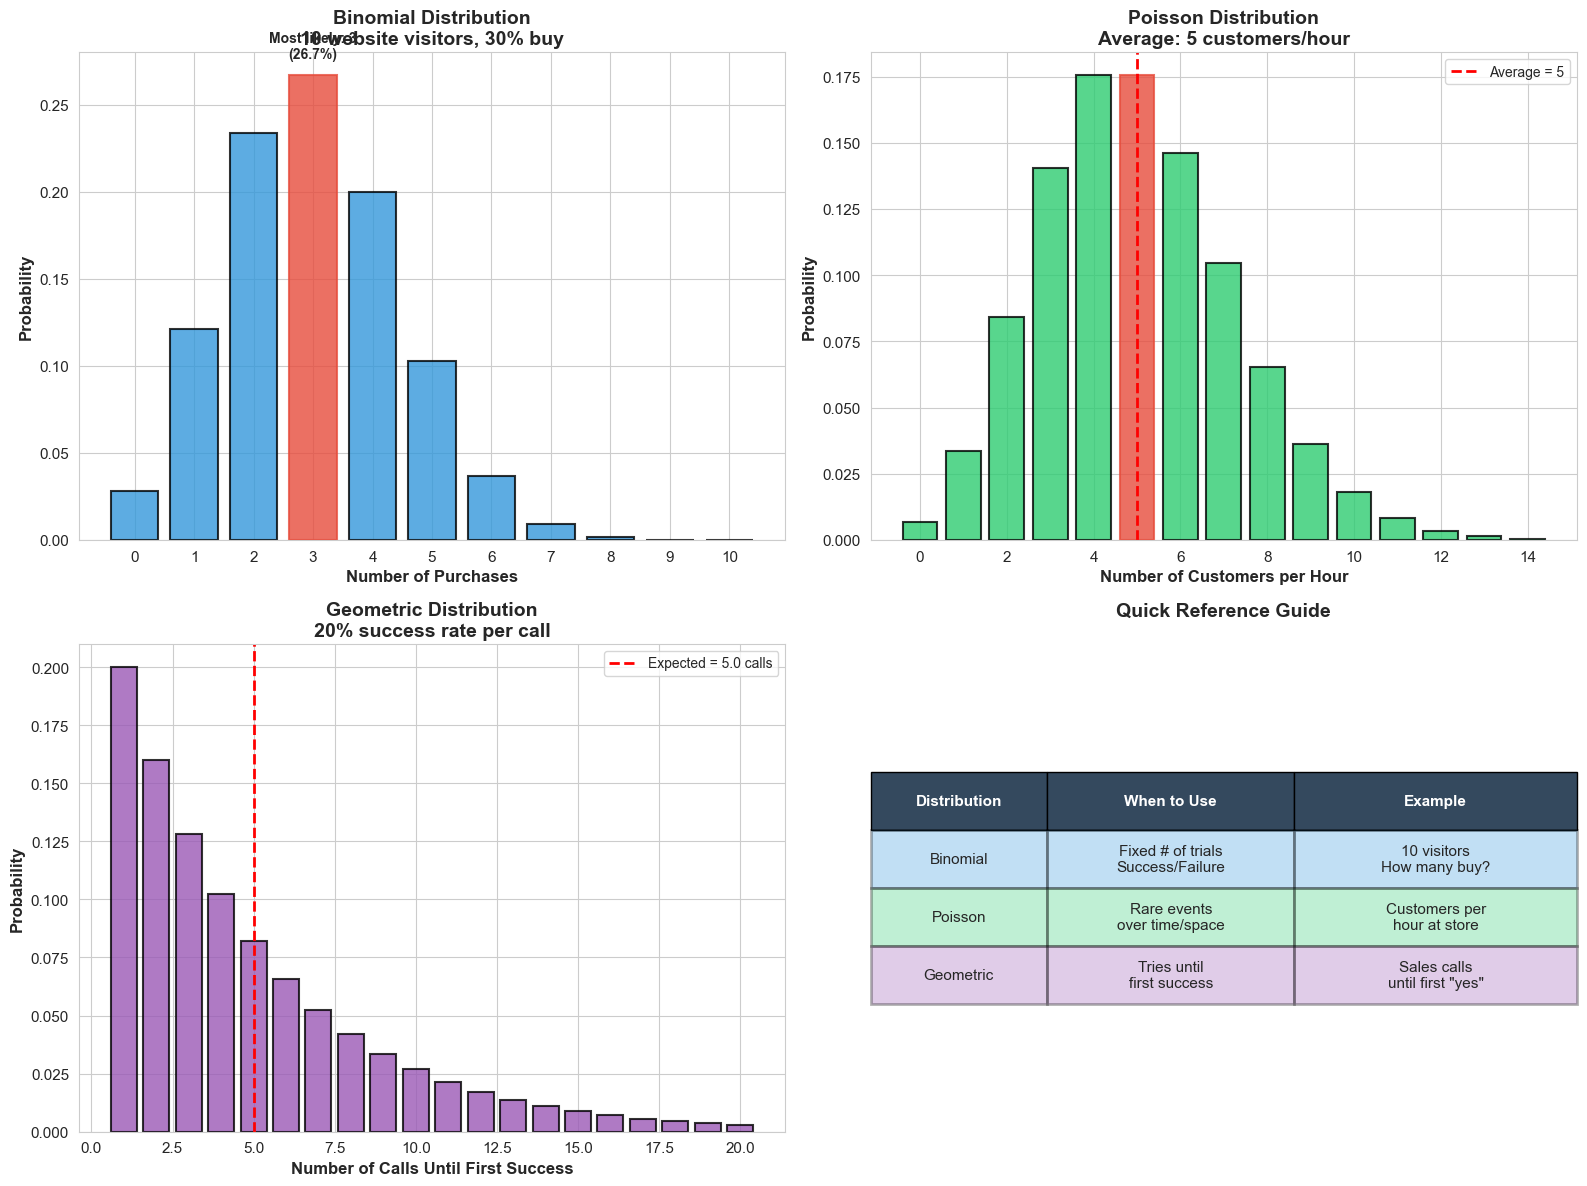


📊 KEY TAKEAWAYS:
• Binomial: 'Out of N tries, how many successes?' → A/B testing
• Poisson: 'How many events in this time window?' → Customer arrivals
• Geometric: 'How many tries until first success?' → Sales prospecting


In [4]:
# SLIDE 9 VISUALIZATION: Discrete Probability Distributions

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. BINOMIAL: Website visitors
ax = axes[0, 0]
n, p = 10, 0.3
x = np.arange(0, n+1)
pmf = stats.binom.pmf(x, n, p)

bars = ax.bar(x, pmf, color='#3498db', alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Number of Purchases', fontsize=12, fontweight='bold')
ax.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax.set_title('Binomial Distribution\n10 website visitors, 30% buy', fontsize=14, fontweight='bold')
ax.set_xticks(x)

max_idx = np.argmax(pmf)
bars[max_idx].set_color('#e74c3c')
ax.text(max_idx, pmf[max_idx] + 0.01, f'Most likely: {max_idx}\n({pmf[max_idx]:.1%})', 
        ha='center', fontsize=10, fontweight='bold')

# 2. POISSON: Customer arrivals
ax = axes[0, 1]
mu = 5
x = np.arange(0, 15)
pmf = stats.poisson.pmf(x, mu)

bars = ax.bar(x, pmf, color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Number of Customers per Hour', fontsize=12, fontweight='bold')
ax.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax.set_title('Poisson Distribution\nAverage: 5 customers/hour', fontsize=14, fontweight='bold')

max_idx = np.argmax(pmf)
bars[max_idx].set_color('#e74c3c')
ax.axvline(mu, color='red', linestyle='--', linewidth=2, label=f'Average = {mu}')
ax.legend(fontsize=10)

# 3. GEOMETRIC: Sales calls
ax = axes[1, 0]
p = 0.2
x = np.arange(1, 21)
pmf = stats.geom.pmf(x, p)

bars = ax.bar(x, pmf, color='#9b59b6', alpha=0.8, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Number of Calls Until First Success', fontsize=12, fontweight='bold')
ax.set_ylabel('Probability', fontsize=12, fontweight='bold')
ax.set_title('Geometric Distribution\n20% success rate per call', fontsize=14, fontweight='bold')

expected = 1/p
ax.axvline(expected, color='red', linestyle='--', linewidth=2, label=f'Expected = {expected:.1f} calls')
ax.legend(fontsize=10)

# 4. COMPARISON TABLE
ax = axes[1, 1]
ax.axis('tight')
ax.axis('off')

table_data = [
    ['Distribution', 'When to Use', 'Example'],
    ['Binomial', 'Fixed # of trials\nSuccess/Failure', '10 visitors\nHow many buy?'],
    ['Poisson', 'Rare events\nover time/space', 'Customers per\nhour at store'],
    ['Geometric', 'Tries until\nfirst success', 'Sales calls\nuntil first "yes"']
]

table = ax.table(cellText=table_data, cellLoc='center', loc='center', colWidths=[0.25, 0.35, 0.4])
table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 3)

for i in range(3):
    table[(0, i)].set_facecolor('#34495e')
    table[(0, i)].set_text_props(weight='bold', color='white')

colors_table = ['#3498db', '#2ecc71', '#9b59b6']
for i in range(1, 4):
    for j in range(3):
        table[(i, j)].set_facecolor(colors_table[i-1])
        table[(i, j)].set_alpha(0.3)
        table[(i, j)].set_edgecolor('black')
        table[(i, j)].set_linewidth(2)

ax.set_title('Quick Reference Guide', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

print("\n📊 KEY TAKEAWAYS:")
print("• Binomial: 'Out of N tries, how many successes?' → A/B testing")
print("• Poisson: 'How many events in this time window?' → Customer arrivals")
print("• Geometric: 'How many tries until first success?' → Sales prospecting")